In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df=pd.read_csv('spam.csv',encoding="latin-1")

In [3]:
df1=df.copy()

In [4]:
df1.shape

(5572, 5)

In [5]:
df1.sample(5)

v1                                                 v2 Unnamed: 2  \
4223  ham  Double eviction this week - Spiral and Michael...        NaN   
2109  ham             Lara said she can loan me  &lt;#&gt; .        NaN   
5152  ham  Idk. I'm sitting here in a stop and shop parki...        NaN   
219   ham  Yeah you should. I think you can use your gt a...        NaN   
2397  ham                          Neshanth..tel me who r u?        NaN   

     Unnamed: 3 Unnamed: 4  
4223        NaN        NaN  
2109        NaN        NaN  
5152        NaN        NaN  
219         NaN        NaN  
2397        NaN        NaN

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#Data Cleaning:

1.**Unamed-2,Unamed-3,Unamed-4**:They do not seem to add any value to our overall goal so I am planning to drop them.

2.**v1 and v2**:The column name does not provide an any information about these features so I will rename it to 'Type' and 'Text'.

3.**v2**:To gain useful insight, I'll change Ham to '0' and spam to '1' using Label Encoding.


In [7]:
df1.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)

In [8]:
df1=df1.rename(columns={'v1':'Type','v2':'Text'})

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
df1.Type=le.fit_transform(df1.Type)

In [11]:
df1.sample(5)

Type                                               Text
4485     0                               have * good weekend.
3615     0  Can you please ask macho what his price range ...
3621     0         Goin to workout lor... Muz lose e fats... 
2119     0              I hope you know I'm still mad at you.
3358     1  Sorry I missed your call let's talk when you h...

In [12]:
df1.isnull().sum()

Type    0
Text    0
dtype: int64

In [13]:
def delete_duplicate_values(df):
    print('Deleting the duplicated values:')
    num=df.duplicated().sum()
    if num>0:
        print(f'There are {num} duplicate values in your dataset.')
        df.drop_duplicates(keep='first',inplace=True)
        print(f'{num} duplicate values have been deleted.')
    else:
        print('There are no duplicate values.')

In [14]:
delete_duplicate_values(df1)

Deleting the duplicated values:
There are 403 duplicate values in your dataset.
403 duplicate values have been deleted.


#EDA

In [15]:
df1.Type.value_counts()

Type
0    4516
1     653
Name: count, dtype: int64

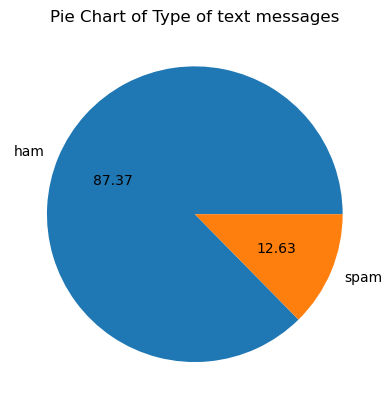

In [16]:
plt.pie(df1.Type.value_counts(),autopct='%0.2f',labels=['ham','spam'])
plt.title('Pie Chart of Type of text messages')
plt.show()

The dataset is highly imbalanced as 87.37% of the data are not spam and 12.63% of the data is spam. However, since my major focus is in maximizing the precision, I will not balance this dataset.

In [17]:
import nltk

In [18]:
#Finding the number of characters in the document:
df1['num_characters'] = df1['Text'].apply(len)

In [19]:
#nltk.download('punkt')
#nltk.download('punkt_tab')
df1['num_words']=df1.Text.apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df1['num_sentences']=df1.Text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [21]:
df1.sample(5)

Type                                               Text  num_characters  \
3239     0  A cute thought for friendship: \Its not necess...              90   
4406     0  Awesome, plan to get here any time after like ...              93   
5395     0  Dunno lei shd b driving lor cos i go sch 1 hr ...              50   
1547     0  Bishan lar nearer... No need buy so early cos ...              79   
4736     0  Nt only for driving even for many reasons she ...             175   

      num_words  num_sentences  
3239         17              1  
4406         27              1  
5395         14              1  
1547         20              1  
4736         39              2

In [22]:
df1[['num_characters','num_words','num_sentences']].describe().T

count       mean        std  min   25%   50%    75%    max
num_characters  5169.0  78.977945  58.236293  2.0  36.0  60.0  117.0  910.0
num_words       5169.0  18.455794  13.324758  1.0   9.0  15.0   26.0  220.0
num_sentences   5169.0   1.965564   1.448541  1.0   1.0   1.0    2.0   38.0

Number of Words: The mean number of words is 18 words per sentence. However there is a sentence which has 220 words which seems way of than the 75th percentile which is 26 words.

Number of Sentences: Usually each document has a mean of 2 sentences, however there is a document that has 38 sentences which is also far of from the 75th percentile which is 2 sentences.

In [23]:
pd.set_option('display.max_colwidth', None)

In [24]:
df1[df1.num_words==220]

Type  \
1578     0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Text  \
1578  How to Make a girl Happy? It's not at all difficult to make girls happy. U only need to be... 1. A friend 2. Companion 3. Lover 4. Chef . . .  &lt;#&gt; . Good listener  &lt;#&gt; . Organizer  &lt;#&gt; . Good boyfriend  &lt;#&gt; . Very clean  &lt;#&gt; . Sympathetic  &lt;#&gt; . Athletic  &lt;#&gt; . Warm . . .  &lt;#&gt; . Courageous  &lt;#&gt; . Determined  &lt;#&gt; . True  &lt;#&gt; . Dependable  &lt;#&gt; . Intelligent . . .  &lt;#&gt; . Psychologist  &lt;#&gt; . Pest exterminator  &lt;#&gt; . Psychiatrist  &lt;#&gt; . Healer . .  &lt;#&gt; . Stylist  &lt;#&gt; . Driver . . Aaniye pudunga venaam..   

      num_characters  num_words  num_sentences  
1578             611        220             38

This row is an outlier and the formatting of the text of this also looks like a joke. This text does not contain any suspicious word that would categorize it as spam but the words'Aaniye pudunga venaam' is grammatically incorrect. So, I have planned to remove this text as it looks like a potential spam/joke to me.

In [25]:
df1.drop(index=1578,inplace=True)

In [26]:
df1[['num_characters','num_words','num_sentences']].describe().T

count       mean        std  min   25%   50%    75%    max
num_characters  5168.0  78.875000  57.769644  2.0  36.0  60.0  117.0  910.0
num_words       5168.0  18.416796  13.027685  1.0   9.0  15.0   26.0  196.0
num_sentences   5168.0   1.958591   1.359164  1.0   1.0   1.0    2.0   18.0

In [27]:
df1[df1.num_words==196]

Type  \
1862     0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Text  \
1862  The last thing i ever wanted to do was hurt you. And i didn't think it would have. You'd laugh, be embarassed, delete the tag and keep going. But as far as i knew, it wasn't even up. The fact that you even felt like i would do it to hurt you shows you really don't know me at all. It was messy wednesday, but it wasn't bad. The problem i have with it is you HAVE the time to clean it, but you choose not to. You skype, you take pictures, you sleep, you want to go out. I don't mind a few things here and there, but when you don't make the bed, when you throw laundry on top of it, when i can't have a friend in the house because i'm embarassed that there's underwear and bras strewn on the bed, pillows on the floor, that's something else. You used to be good about at least making the bed.   

      num_characters  num_words  num_sentences  
1862             790        196             10

This looks like a geniue message so I am keeping it even when the number of sentences and words is way beyound in comparision with other documnets.

In [28]:
df1[df1.Type==0][['num_characters','num_words','num_sentences']].describe().T

count       mean        std  min   25%   50%   75%    max
num_characters  4515.0  70.339535  55.787170  2.0  34.0  52.0  90.0  910.0
num_words       4515.0  17.078848  13.153232  1.0   8.0  13.0  22.0  196.0
num_sentences   4515.0   1.812182   1.274710  1.0   1.0   1.0   2.0   18.0

In [29]:
df1[df1.Type==1][['num_characters','num_words','num_sentences']].describe().T

count        mean        std   min    25%    50%    75%    max
num_characters  653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0
num_words       653.0   27.667688   7.008418   2.0   25.0   29.0   32.0   46.0
num_sentences   653.0    2.970904   1.488425   1.0    2.0    3.0    4.0    9.0

From the above table we can clearly see that usually spam emails have a median of 29 words,whereas, ham messages ham an median of 13 words. On average, spam messages contains 16 words more than ham messages.

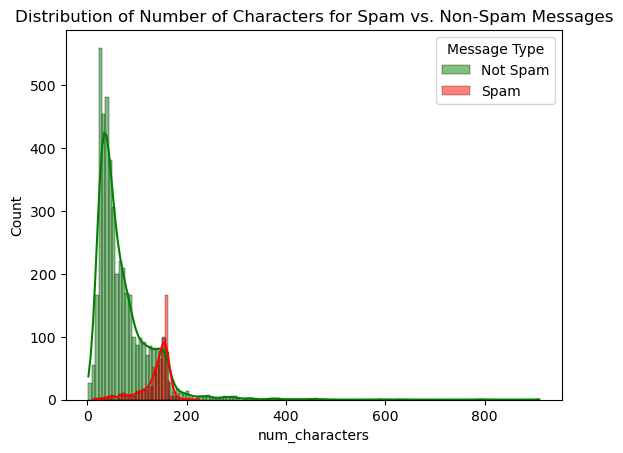

In [30]:
sns.histplot(df1[df1.Type==0]['num_characters'],color='green',kde=True,label='Not Spam')
sns.histplot(df1[df1.Type==1]['num_characters'],color='red',kde=True,label='Spam')
plt.legend(title='Message Type')
plt.title('Distribution of Number of Characters for Spam vs. Non-Spam Messages')
plt.show()

In [31]:
ham_skewness=df1[df1.Type==0]['num_characters'].skew()
spam_skewness=df1[df1.Type==1]['num_characters'].skew()

In [32]:
print(f' The skewness of characters in not spam messages is: {ham_skewness}')
print(f' The skewness of characters in spam messages is: {spam_skewness}')

 The skewness of characters in not spam messages is: 3.410638138750707
 The skewness of characters in spam messages is: -1.7133837509335121


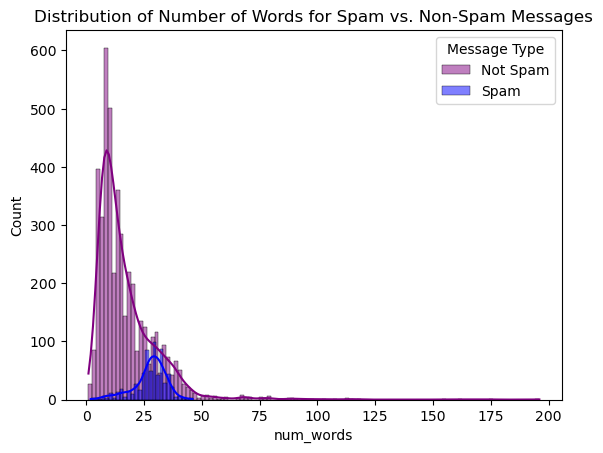

In [33]:
sns.histplot(df1[df1.Type==0]['num_words'],color='purple',kde=True,label='Not Spam')
sns.histplot(df1[df1.Type==1]['num_words'],color='blue',kde=True,label='Spam')
plt.legend(title='Message Type')
plt.title('Distribution of Number of Words for Spam vs. Non-Spam Messages')
plt.show()

In [34]:
ham_skewness=df1[df1.Type==0]['num_words'].skew()
spam_skewness=df1[df1.Type==1]['num_words'].skew()

In [35]:
print(f' The skewness of words in not spam messages is:{ham_skewness}')
print(f' The skewness of words in spam messages is: {spam_skewness}')

 The skewness of words in not spam messages is:3.34569446738514
 The skewness of words in spam messages is: -0.9478264971647723


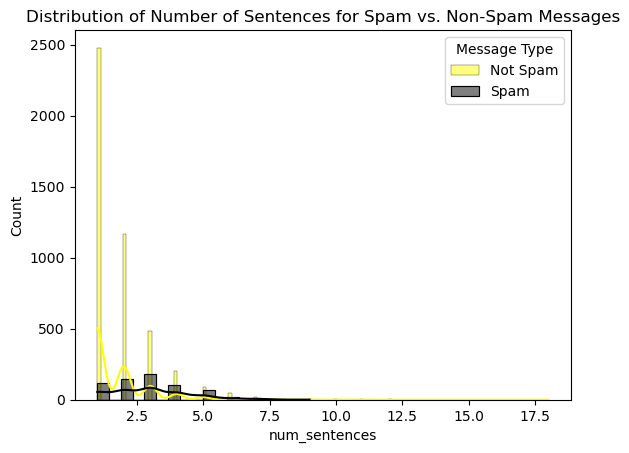

In [36]:
sns.histplot(df1[df1.Type==0]['num_sentences'],color='yellow',kde=True,label='Not Spam')
sns.histplot(df1[df1.Type==1]['num_sentences'],color='black',kde=True,label='Spam')
plt.legend(title='Message Type')
plt.title('Distribution of Number of Sentences for Spam vs. Non-Spam Messages')
plt.show()

In [37]:
ham_skewness=df1[df1.Type==0]['num_sentences'].skew()
spam_skewness=df1[df1.Type==1]['num_sentences'].skew()

In [38]:
print(f' The skewness of sentences in not spam messages is: {ham_skewness}')
print(f' The skewness of sentences in spam messages is: {spam_skewness}')

 The skewness of sentences in not spam messages is: 3.012645180334055
 The skewness of sentences in spam messages is: 0.6518254613126102


#Text Preprocessing

1. Lowercasing
2. Tokenization
3. Removing Special Characters
4. Removing Stop Words and Punctuation
5. Stemming

In [39]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('wordnet')
from nltk.stem import SnowballStemmer
import string

In [40]:
def text_preprocessing(text):
    #Lowercasing the text:
    text=text.lower()
    #Tokenizing the document into words:
    text=nltk.word_tokenize(text)
    #Removing Special characters:
    new_text=[]
    for word in text:
        if word.isalnum():
            new_text.append(word)
    text=new_text[:]
    new_text.clear()
    
    #Removing Stop Words:
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            new_text.append(word)

    text=new_text[:]
    new_text.clear()
    
    #Stemming:
    snow_ball=SnowballStemmer('english')
    for word in text:
        new_text.append(snow_ball.stem(word))

    return " ".join(new_text)

In [41]:
df1['Transformed_Text']=df1.Text.apply(text_preprocessing)
df1.sample(5)

Type  \
2444     0   
803      1   
4665     0   
4874     0   
1039     0   

                                                                                                                                                 Text  \
2444                                                                                                   Yes but i dont care! I need you bad, princess!   
803   You have won a guaranteed å£200 award or even å£1000 cashto claim UR award call free on 08000407165 (18+) 2 stop getstop on 88222 PHP. RG21 4JX   
4665                                                                                                                         Not..tel software name..   
4874                                                            I know dat feelin had it with Pete! Wuld get with em , nuther place nuther time mayb?   
1039                                                                                              They just talking thats it de. They wont any other.   

      num_characters  num_words  num_sentences  \
2444              46         13              2   
803              143         30              2   
4665              24          6              1   
4874              85         20              2   
1039              51         12              2   

                                                                                       Transformed_Text  
2444                                                                    yes dont care need bad princess  
803   guarante award even cashto claim ur award call free 08000407165 2 stop getstop 88222 php rg21 4jx  
4665                                                                                   tel softwar name  
4874                                     know dat feelin pete wuld get em nuther place nuther time mayb  
1039                                                                                  talk that de wont

In [42]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [43]:
ham_words=df1[df1.Type==0]['Transformed_Text'].str.cat(sep=" ")

In [44]:
ham_wc=wc.generate(ham_words)

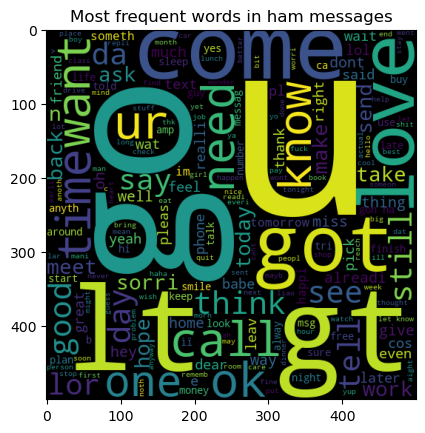

In [45]:
plt.imshow(ham_wc)
plt.title('Most frequent words in ham messages')
plt.show()

In [46]:
spam_words=df1[df1.Type==1]['Transformed_Text'].str.cat(sep=" ")

In [47]:
spam_wc=wc.generate(spam_words)

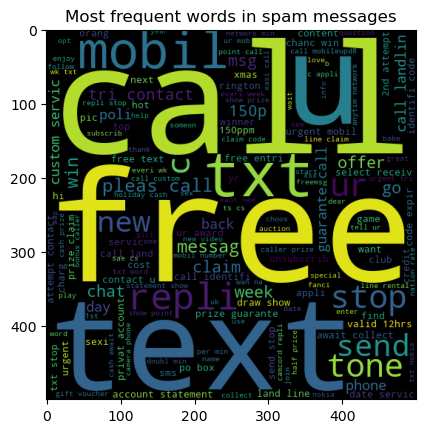

In [48]:
plt.imshow(spam_wc)
plt.title('Most frequent words in spam messages')
plt.show()

In [49]:
#!pip install collections
from collections import Counter

In [50]:
def text_counter(text,number=15):
    all_text=" ".join(text)
    all_word=word_tokenize(all_text)
    word_count=Counter(all_word)
    top_words=word_count.most_common(number)
    return top_words

In [51]:
ham_top_words=text_counter(df1[df1.Type==0]['Transformed_Text'])
ham_df = pd.DataFrame(ham_top_words, columns=['Word', 'Frequency'])

In [52]:
spam_top_words=text_counter(df1[df1.Type==1]['Transformed_Text'])
spam_df = pd.DataFrame(spam_top_words, columns=['Word', 'Frequency'])

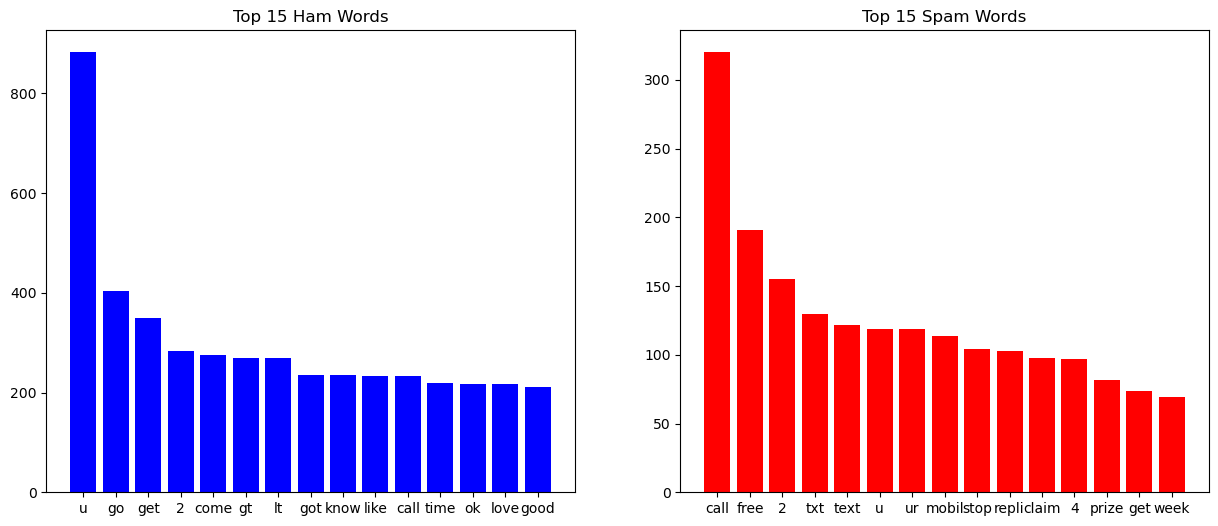

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].bar(ham_df['Word'],ham_df['Frequency'], color='blue')
axes[0].set_title('Top 15 Ham Words')
axes[1].bar(spam_df['Word'],spam_df['Frequency'], color='red')
axes[1].set_title('Top 15 Spam Words')

plt.show()

From the above bar plot and word cloud, we can clearly see that ham messages have a more sober wording,whereas,spam messages have some desparate words like free,prize. Moreover, the word call appears to be present in both ham and spam words,however, the frequency of the word in spam messages is slightly higher even when the dataset is unbalanced.

#Model Bulding and Text Vectorization: